## INTRODUCTION

- Machine learning is a branch of artificial intelligence (AI) that involves training computer algorithms to learn patterns from data, without being explicitly programmed to do so. In other words, instead of providing rules for the computer to follow, we give it examples of what we want it to learn, and the algorithm figures out the patterns that underlie the data.

- Machine learning is used to develop predictive models that can make accurate predictions about future outcomes based on past data. These models are used in a wide variety of applications, from natural language processing and computer vision to fraud detection and personalized recommendations.
- In this project, we will be using a Weather forcasting dataset to predict whether it will be diizzy, rainy, sun, fog,snow. We willbe exploring different machine learning algorithms such as decision tree, K-nearest neighbors (KNN),logistic regression, and support vector machine (SVM) to determine which algorithm performs best for this particular problem.
- Our goal is to build a predictive model that accurately identifies what will be the weather is , based on their tempreture information. This model will be valuable for weather forcasting team. By leveraging machine learning techniques, we can improve the accuracyand efficiency of these processes, and ultimately provide better service to our customers.

### PROBLEM STATMENT

* The problem statement for this machine learning project is to predict whether  it will be diizzy, rainy, sun, fog,snow. we aim to build a predictive model that accurately identifies what will be weather. This model will help weather forcasting team to make more informed lending decisions, and identify potential natural disaster.
* To summarize the Problem statement we are bulding a Machine learning Model to predict weather there will be diizzy, rainy, sun, fog,snow .


### Firstly we have to import necessary Libraries for our Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset from which Algorithm can be Trained

### Weather Forcasting Dataset

In [2]:
df = pd.read_csv(r'/content/seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Data Description

#### Given are the columns is the dataset

In [3]:
df.shape

(1461, 6)

In [4]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

#### Now the next step is to check the null values in the data

In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

#### Now the next step is to check the info of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.drop('date',axis =1 ,inplace=True)

#### Here all the columns are not in integer so we will apply ordinal encoder to that columns

In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [9]:
oe.fit_transform(df['weather'].values.reshape(-1, 1))

array([[0.],
       [2.],
       [2.],
       ...,
       [1.],
       [4.],
       [4.]])

In [10]:
df.select_dtypes('object').columns

Index(['weather'], dtype='object')

In [11]:
dw = df.select_dtypes('object').columns

In [12]:
oe.fit_transform(df[dw])

array([[0.],
       [2.],
       [2.],
       ...,
       [1.],
       [4.],
       [4.]])

In [13]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [14]:
#pip install imblearn

In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
df[dw]= oe.fit_transform(df[dw])

In [17]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0.0
1,10.9,10.6,2.8,4.5,2.0
2,0.8,11.7,7.2,2.3,2.0
3,20.3,12.2,5.6,4.7,2.0
4,1.3,8.9,2.8,6.1,2.0
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2.0
1457,1.5,5.0,1.7,1.3,2.0
1458,0.0,7.2,0.6,2.6,1.0
1459,0.0,5.6,-1.0,3.4,4.0


### Now we will build some insights from the data through various graphical representation

#### count plot

##### This Graph represents on which day most of the deposits are made

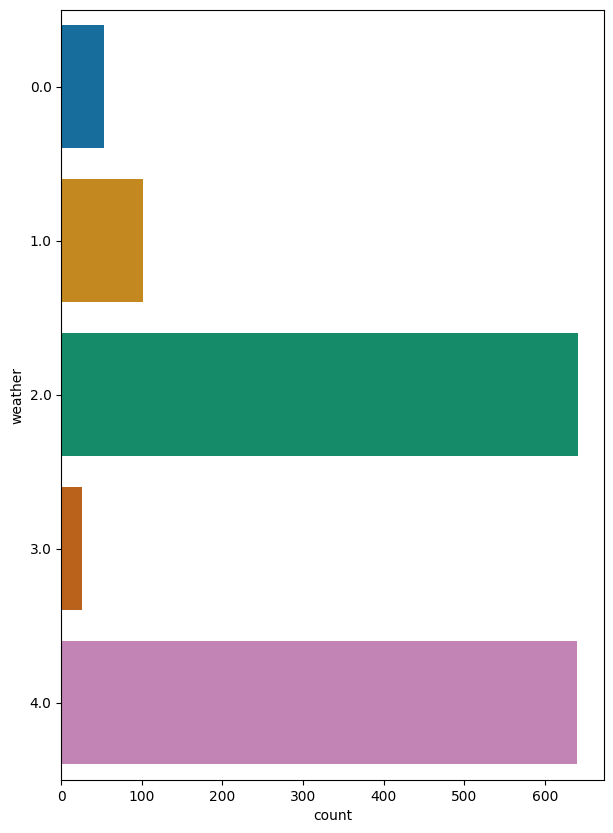

In [57]:
plt.figure(figsize= (7,10))
sns.countplot(y =df['weather'],data = df,dodge=False,palette='colorblind')
plt.show()

### Regression Line

<Figure size 600x700 with 0 Axes>

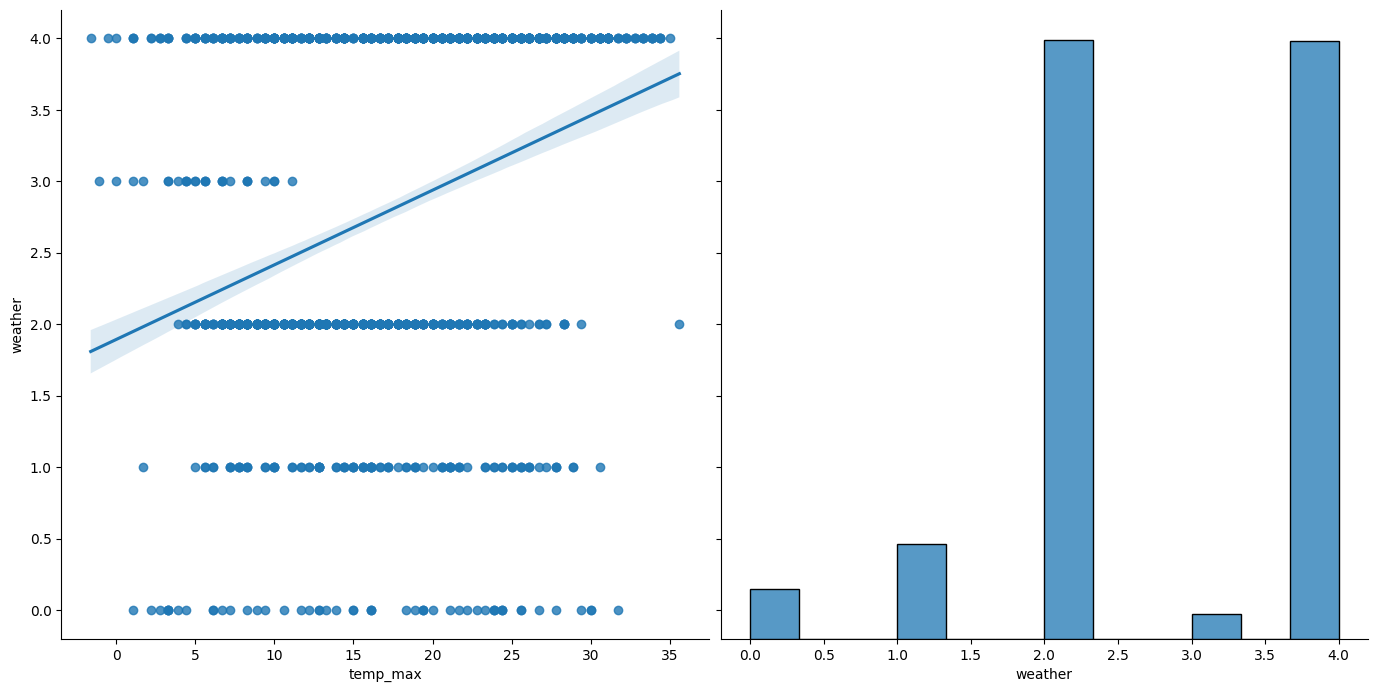

In [59]:
plt.figure(figsize = (6,7))
sns.pairplot(x_vars=['temp_max','weather'],data=df,y_vars='weather',kind='reg',size = 7)
plt.show()

<Figure size 600x700 with 0 Axes>

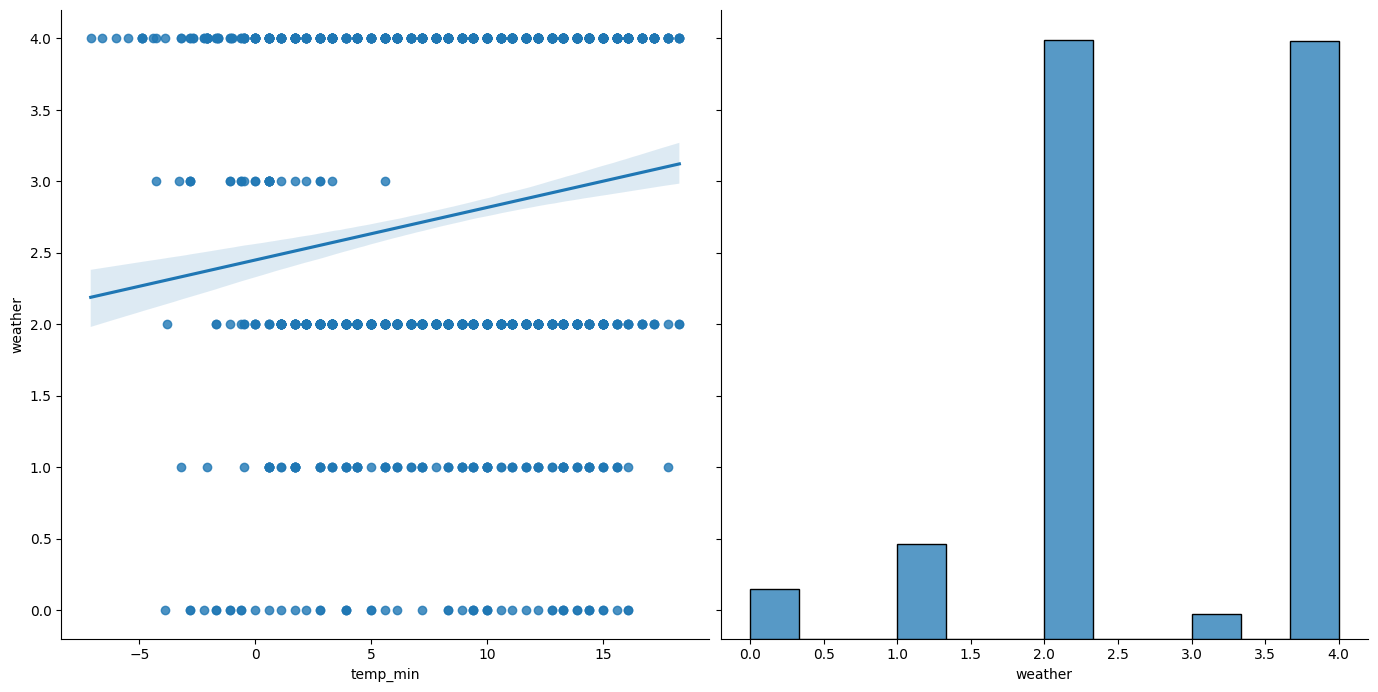

In [60]:
plt.figure(figsize = (6,7))
sns.pairplot(x_vars=['temp_min','weather'],data=df,y_vars='weather',kind='reg',size = 7)
plt.show()

### Pie Chart

An infromation that provides ratio between wind flow

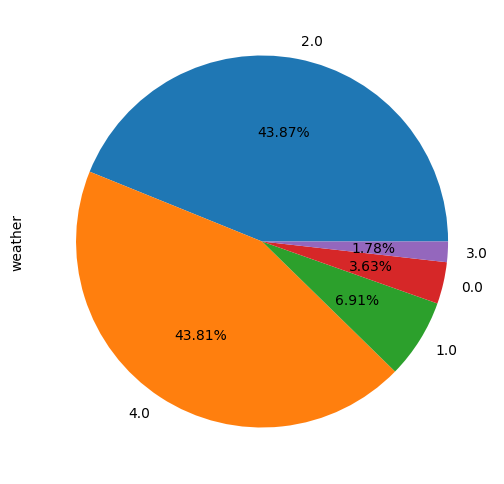

In [61]:
plt.figure(figsize = (6,7))
df['weather'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')
plt.show()

Here it shows us maximum Tempreture show

### Correlation

In [24]:
df.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,-0.267388,0.322337,0.154981,-0.065858,1.000000


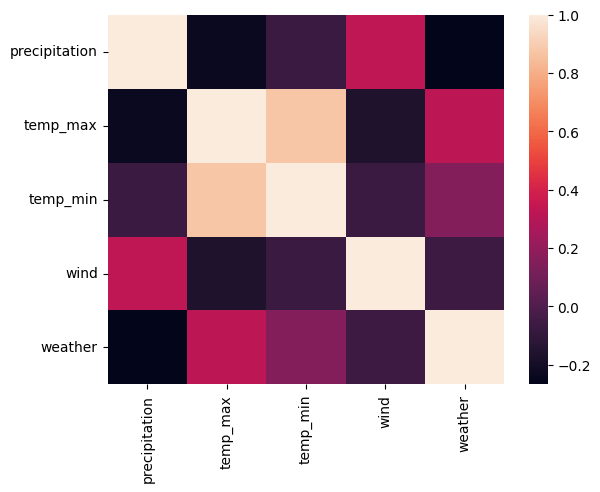

In [25]:
sns.heatmap(df.corr())
plt.show()

### So the conclusion is that no columns will be removed as every column in the data have some information which will be helpful in future prediction

### Training Process

#### we will now split the features and target

In [26]:
x = df.iloc[:,1:5]
x

,temp_max,temp_min,wind,weather
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,2.0
2,11.7,7.2,2.3,2.0
3,12.2,5.6,4.7,2.0
4,8.9,2.8,6.1,2.0
...,...,...,...,...
1456,4.4,1.7,2.9,2.0
1457,5.0,1.7,1.3,2.0
1458,7.2,0.6,2.6,1.0
1459,5.6,-1.0,3.4,4.0


In [27]:
y = df.iloc[:,-1]
y

0       0.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1456    2.0
1457    2.0
1458    1.0
1459    4.0
1460    4.0
Name: weather, Length: 1461, dtype: float64

In [28]:
y.value_counts()

2.0    641
4.0    640
1.0    101
0.0     53
3.0     26
Name: weather, dtype: int64

In [29]:
#pip install imbalanced-learn

In [30]:
import imblearn

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(random_state=42)

Xr, yr = smote.fit_resample(x , y)

In [33]:
yr.value_counts()

0.0    641
2.0    641
4.0    641
3.0    641
1.0    641
Name: weather, dtype: int64

### now we will perform Train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xr,yr,test_size=0.3,random_state=42)

In the above code i have just imported the train_test_split model and
applied the model to the dataset in 70 : 30 ratio so that the machine will take learnings from 70 % of the
data and make a testing on 30 % of the data and hence make a optimum conclusion

### Algorithms

now we will import algorithms

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [36]:
#now we will assign variable to those algorithms
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [37]:
#for accuracy we will import classification report and accuracy score
from sklearn.metrics import classification_report,accuracy_score

### Building a Class named Mymodel so that the accuracies can be easily predicted

In [38]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Accuracy score :',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    train = model.score(X_train,y_train)
    test  = model.score(X_test,y_test)
    print('Training performance :',train)
    print('testing performance :',test)

#### Applying diffrent algorithms on the Class to check accuracy of each and finding the best and most accurate Algorithm for Prediction


### Logistic Regression

In [39]:
mymodel(logreg)

Accuracy score : 0.9823284823284824
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       187
         1.0       1.00      0.99      1.00       192
         2.0       1.00      0.96      0.98       188
         3.0       0.93      0.99      0.96       193
         4.0       0.99      0.97      0.98       202

    accuracy                           0.98       962
   macro avg       0.98      0.98      0.98       962
weighted avg       0.98      0.98      0.98       962

Training performance : 0.9866250557289344
testing performance : 0.9823284823284824


### KNeighbors

In [40]:
mymodel(knn)

Accuracy score : 0.9573804573804574
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       187
         1.0       0.93      0.97      0.95       192
         2.0       0.99      0.91      0.95       188
         3.0       0.91      0.99      0.95       193
         4.0       0.99      0.93      0.96       202

    accuracy                           0.96       962
   macro avg       0.96      0.96      0.96       962
weighted avg       0.96      0.96      0.96       962

Training performance : 0.9674543022737405
testing performance : 0.9573804573804574


# Descision Tree

In [41]:
mymodel(dt)

Accuracy score : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       1.00      1.00      1.00       192
         2.0       1.00      1.00      1.00       188
         3.0       1.00      1.00      1.00       193
         4.0       1.00      1.00      1.00       202

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962

Training performance : 1.0
testing performance : 1.0


### SVM

In [42]:
mymodel(svm)

Accuracy score : 0.9719334719334719
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       0.98      1.00      0.99       192
         2.0       0.98      0.94      0.96       188
         3.0       0.91      0.98      0.94       193
         4.0       1.00      0.94      0.97       202

    accuracy                           0.97       962
   macro avg       0.97      0.97      0.97       962
weighted avg       0.97      0.97      0.97       962

Training performance : 0.9692376281765492
testing performance : 0.9719334719334719


### Decision Tree

In [43]:
mymodel(dt)

Accuracy score : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       1.00      1.00      1.00       192
         2.0       1.00      1.00      1.00       188
         3.0       1.00      1.00      1.00       193
         4.0       1.00      1.00      1.00       202

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962

Training performance : 1.0
testing performance : 1.0


In [44]:
for i in range(1,51):    #1
    dt1 =DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Max depth={i}    Accuracy = {ac}")

Max depth=1    Accuracy = 0.3898128898128898
Max depth=2    Accuracy = 0.5893970893970893
Max depth=3    Accuracy = 0.7900207900207901
Max depth=4    Accuracy = 1.0
Max depth=5    Accuracy = 1.0
Max depth=6    Accuracy = 1.0
Max depth=7    Accuracy = 1.0
Max depth=8    Accuracy = 1.0
Max depth=9    Accuracy = 1.0
Max depth=10    Accuracy = 1.0
Max depth=11    Accuracy = 1.0
Max depth=12    Accuracy = 1.0
Max depth=13    Accuracy = 1.0
Max depth=14    Accuracy = 1.0
Max depth=15    Accuracy = 1.0
Max depth=16    Accuracy = 1.0
Max depth=17    Accuracy = 1.0
Max depth=18    Accuracy = 1.0
Max depth=19    Accuracy = 1.0
Max depth=20    Accuracy = 1.0
Max depth=21    Accuracy = 1.0
Max depth=22    Accuracy = 1.0
Max depth=23    Accuracy = 1.0
Max depth=24    Accuracy = 1.0
Max depth=25    Accuracy = 1.0
Max depth=26    Accuracy = 1.0
Max depth=27    Accuracy = 1.0
Max depth=28    Accuracy = 1.0
Max depth=29    Accuracy = 1.0
Max depth=30    Accuracy = 1.0
Max depth=31    Accuracy = 1.0
Max

In [45]:
for i in range(2,51):    #33
    dt1 =DecisionTreeClassifier(min_samples_split=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Min Sample split={i}    Accuracy = {ac}")

Min Sample split=2    Accuracy = 1.0
Min Sample split=3    Accuracy = 1.0
Min Sample split=4    Accuracy = 1.0
Min Sample split=5    Accuracy = 1.0
Min Sample split=6    Accuracy = 1.0
Min Sample split=7    Accuracy = 1.0
Min Sample split=8    Accuracy = 1.0
Min Sample split=9    Accuracy = 1.0
Min Sample split=10    Accuracy = 1.0
Min Sample split=11    Accuracy = 1.0
Min Sample split=12    Accuracy = 1.0
Min Sample split=13    Accuracy = 1.0
Min Sample split=14    Accuracy = 1.0
Min Sample split=15    Accuracy = 1.0
Min Sample split=16    Accuracy = 1.0
Min Sample split=17    Accuracy = 1.0
Min Sample split=18    Accuracy = 1.0
Min Sample split=19    Accuracy = 1.0
Min Sample split=20    Accuracy = 1.0
Min Sample split=21    Accuracy = 1.0
Min Sample split=22    Accuracy = 1.0
Min Sample split=23    Accuracy = 1.0
Min Sample split=24    Accuracy = 1.0
Min Sample split=25    Accuracy = 1.0
Min Sample split=26    Accuracy = 1.0
Min Sample split=27    Accuracy = 1.0
Min Sample split=28 

In [46]:
for i in range(1,51):   #9
    dt1 =DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Min Sample leaf={i}    Accuracy = {ac}")

Min Sample leaf=1    Accuracy = 1.0
Min Sample leaf=2    Accuracy = 1.0
Min Sample leaf=3    Accuracy = 1.0
Min Sample leaf=4    Accuracy = 1.0
Min Sample leaf=5    Accuracy = 1.0
Min Sample leaf=6    Accuracy = 1.0
Min Sample leaf=7    Accuracy = 1.0
Min Sample leaf=8    Accuracy = 1.0
Min Sample leaf=9    Accuracy = 1.0
Min Sample leaf=10    Accuracy = 1.0
Min Sample leaf=11    Accuracy = 1.0
Min Sample leaf=12    Accuracy = 1.0
Min Sample leaf=13    Accuracy = 1.0
Min Sample leaf=14    Accuracy = 1.0
Min Sample leaf=15    Accuracy = 1.0
Min Sample leaf=16    Accuracy = 1.0
Min Sample leaf=17    Accuracy = 1.0
Min Sample leaf=18    Accuracy = 1.0
Min Sample leaf=19    Accuracy = 1.0
Min Sample leaf=20    Accuracy = 1.0
Min Sample leaf=21    Accuracy = 1.0
Min Sample leaf=22    Accuracy = 1.0
Min Sample leaf=23    Accuracy = 1.0
Min Sample leaf=24    Accuracy = 1.0
Min Sample leaf=25    Accuracy = 1.0
Min Sample leaf=26    Accuracy = 1.0
Min Sample leaf=27    Accuracy = 1.0
Min Sample

In [47]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=1,min_samples_split=33,min_samples_leaf=9)

In [48]:
mymodel(dt)

Accuracy score : 0.3898128898128898
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       187
         1.0       0.00      0.00      0.00       192
         2.0       0.32      1.00      0.49       188
         3.0       0.00      0.00      0.00       193
         4.0       0.00      0.00      0.00       202

    accuracy                           0.39       962
   macro avg       0.16      0.40      0.23       962
weighted avg       0.16      0.39      0.22       962

Training performance : 0.40436914846188143
testing performance : 0.3898128898128898


In [49]:
dt = DecisionTreeClassifier(max_depth=1,min_samples_split=33,min_samples_leaf=9)

In [50]:
mymodel(dt)

Accuracy score : 0.3898128898128898
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       0.00      0.00      0.00       192
         2.0       0.24      1.00      0.39       188
         3.0       0.00      0.00      0.00       193
         4.0       0.00      0.00      0.00       202

    accuracy                           0.39       962
   macro avg       0.25      0.40      0.28       962
weighted avg       0.24      0.39      0.27       962

Training performance : 0.40436914846188143
testing performance : 0.3898128898128898


In [51]:
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.8970893970893971
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       0.84      0.77      0.80       192
         2.0       0.77      0.78      0.77       188
         3.0       0.87      0.98      0.92       193
         4.0       1.00      0.96      0.98       202

    accuracy                           0.90       962
   macro avg       0.90      0.90      0.90       962
weighted avg       0.90      0.90      0.90       962

Training performance : 0.8996879179670084
testing performance : 0.8970893970893971


In [52]:
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.9823284823284824
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       187
         1.0       1.00      0.99      1.00       192
         2.0       1.00      0.96      0.98       188
         3.0       0.93      0.99      0.96       193
         4.0       0.99      0.97      0.98       202

    accuracy                           0.98       962
   macro avg       0.98      0.98      0.98       962
weighted avg       0.98      0.98      0.98       962

Training performance : 0.9866250557289344
testing performance : 0.9823284823284824


In [53]:
logreg = LogisticRegression(multi_class='multinomial',solver='saga')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.9386694386694386
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       0.95      0.95      0.95       192
         2.0       0.92      0.87      0.90       188
         3.0       0.88      0.95      0.91       193
         4.0       0.95      0.93      0.94       202

    accuracy                           0.94       962
   macro avg       0.94      0.94      0.94       962
weighted avg       0.94      0.94      0.94       962

Training performance : 0.9469460543914401
testing performance : 0.9386694386694386


### BEST module

In [54]:
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.9823284823284824
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       187
         1.0       1.00      0.99      1.00       192
         2.0       1.00      0.96      0.98       188
         3.0       0.93      0.99      0.96       193
         4.0       0.99      0.97      0.98       202

    accuracy                           0.98       962
   macro avg       0.98      0.98      0.98       962
weighted avg       0.98      0.98      0.98       962

Training performance : 0.9866250557289344
testing performance : 0.9823284823284824


In [55]:
svm = SVC(C = 100.0,gamma=1)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = svm.score(X_train,y_train)
test  = svm.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.9896049896049897
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       187
         1.0       0.99      1.00      1.00       192
         2.0       1.00      0.96      0.98       188
         3.0       1.00      1.00      1.00       193
         4.0       0.96      1.00      0.98       202

    accuracy                           0.99       962
   macro avg       0.99      0.99      0.99       962
weighted avg       0.99      0.99      0.99       962

Training performance : 1.0
testing performance : 0.9896049896049897


## Conclusion

- In this machine learning project, we explored the use of different algorithms such as decision tree, Knearest neighbors (KNN), logistic regression, and support vector machine (SVM) to predict whether a weather will be dizzy, suny, rainy, fog,snow. We used a Weather forcasting dataset containing tempreture information to train and test our models.
- Through our experimentation, we found that logistic Regression algorithm performed the best with the highest accuracy score. This model can be used by weather forcasting team to identify potential risk of natural disaster or other circumstances.
